# Import tools

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

# Download data


In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
cardio_df = df.copy()

In [ ]:
cardio_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
cardio_df.shape

(1025, 14)

In [ ]:
cardio_df.duplicated().sum()

723

In [ ]:
## To drop Duplicate items
cardio_df.drop_duplicates(inplace=True)

In [ ]:
cardio_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
cardio_df.shape

(302, 14)

(1    164
 0    138
 Name: output, dtype: int64,
 <Axes: xlabel='output', ylabel='count'>)

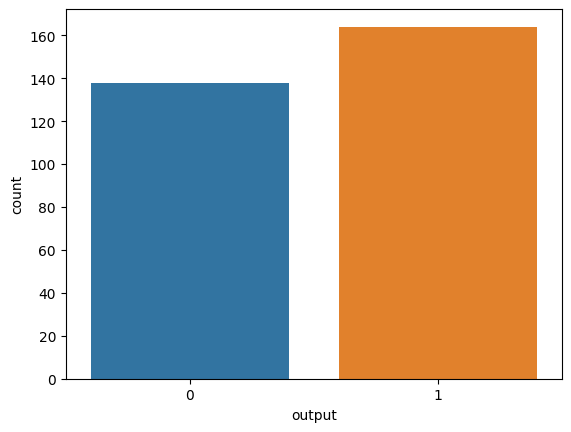

In [ ]:
# View if dataset is balanced
cardio_df["output"].value_counts(),sns.countplot(x=cardio_df["output"])


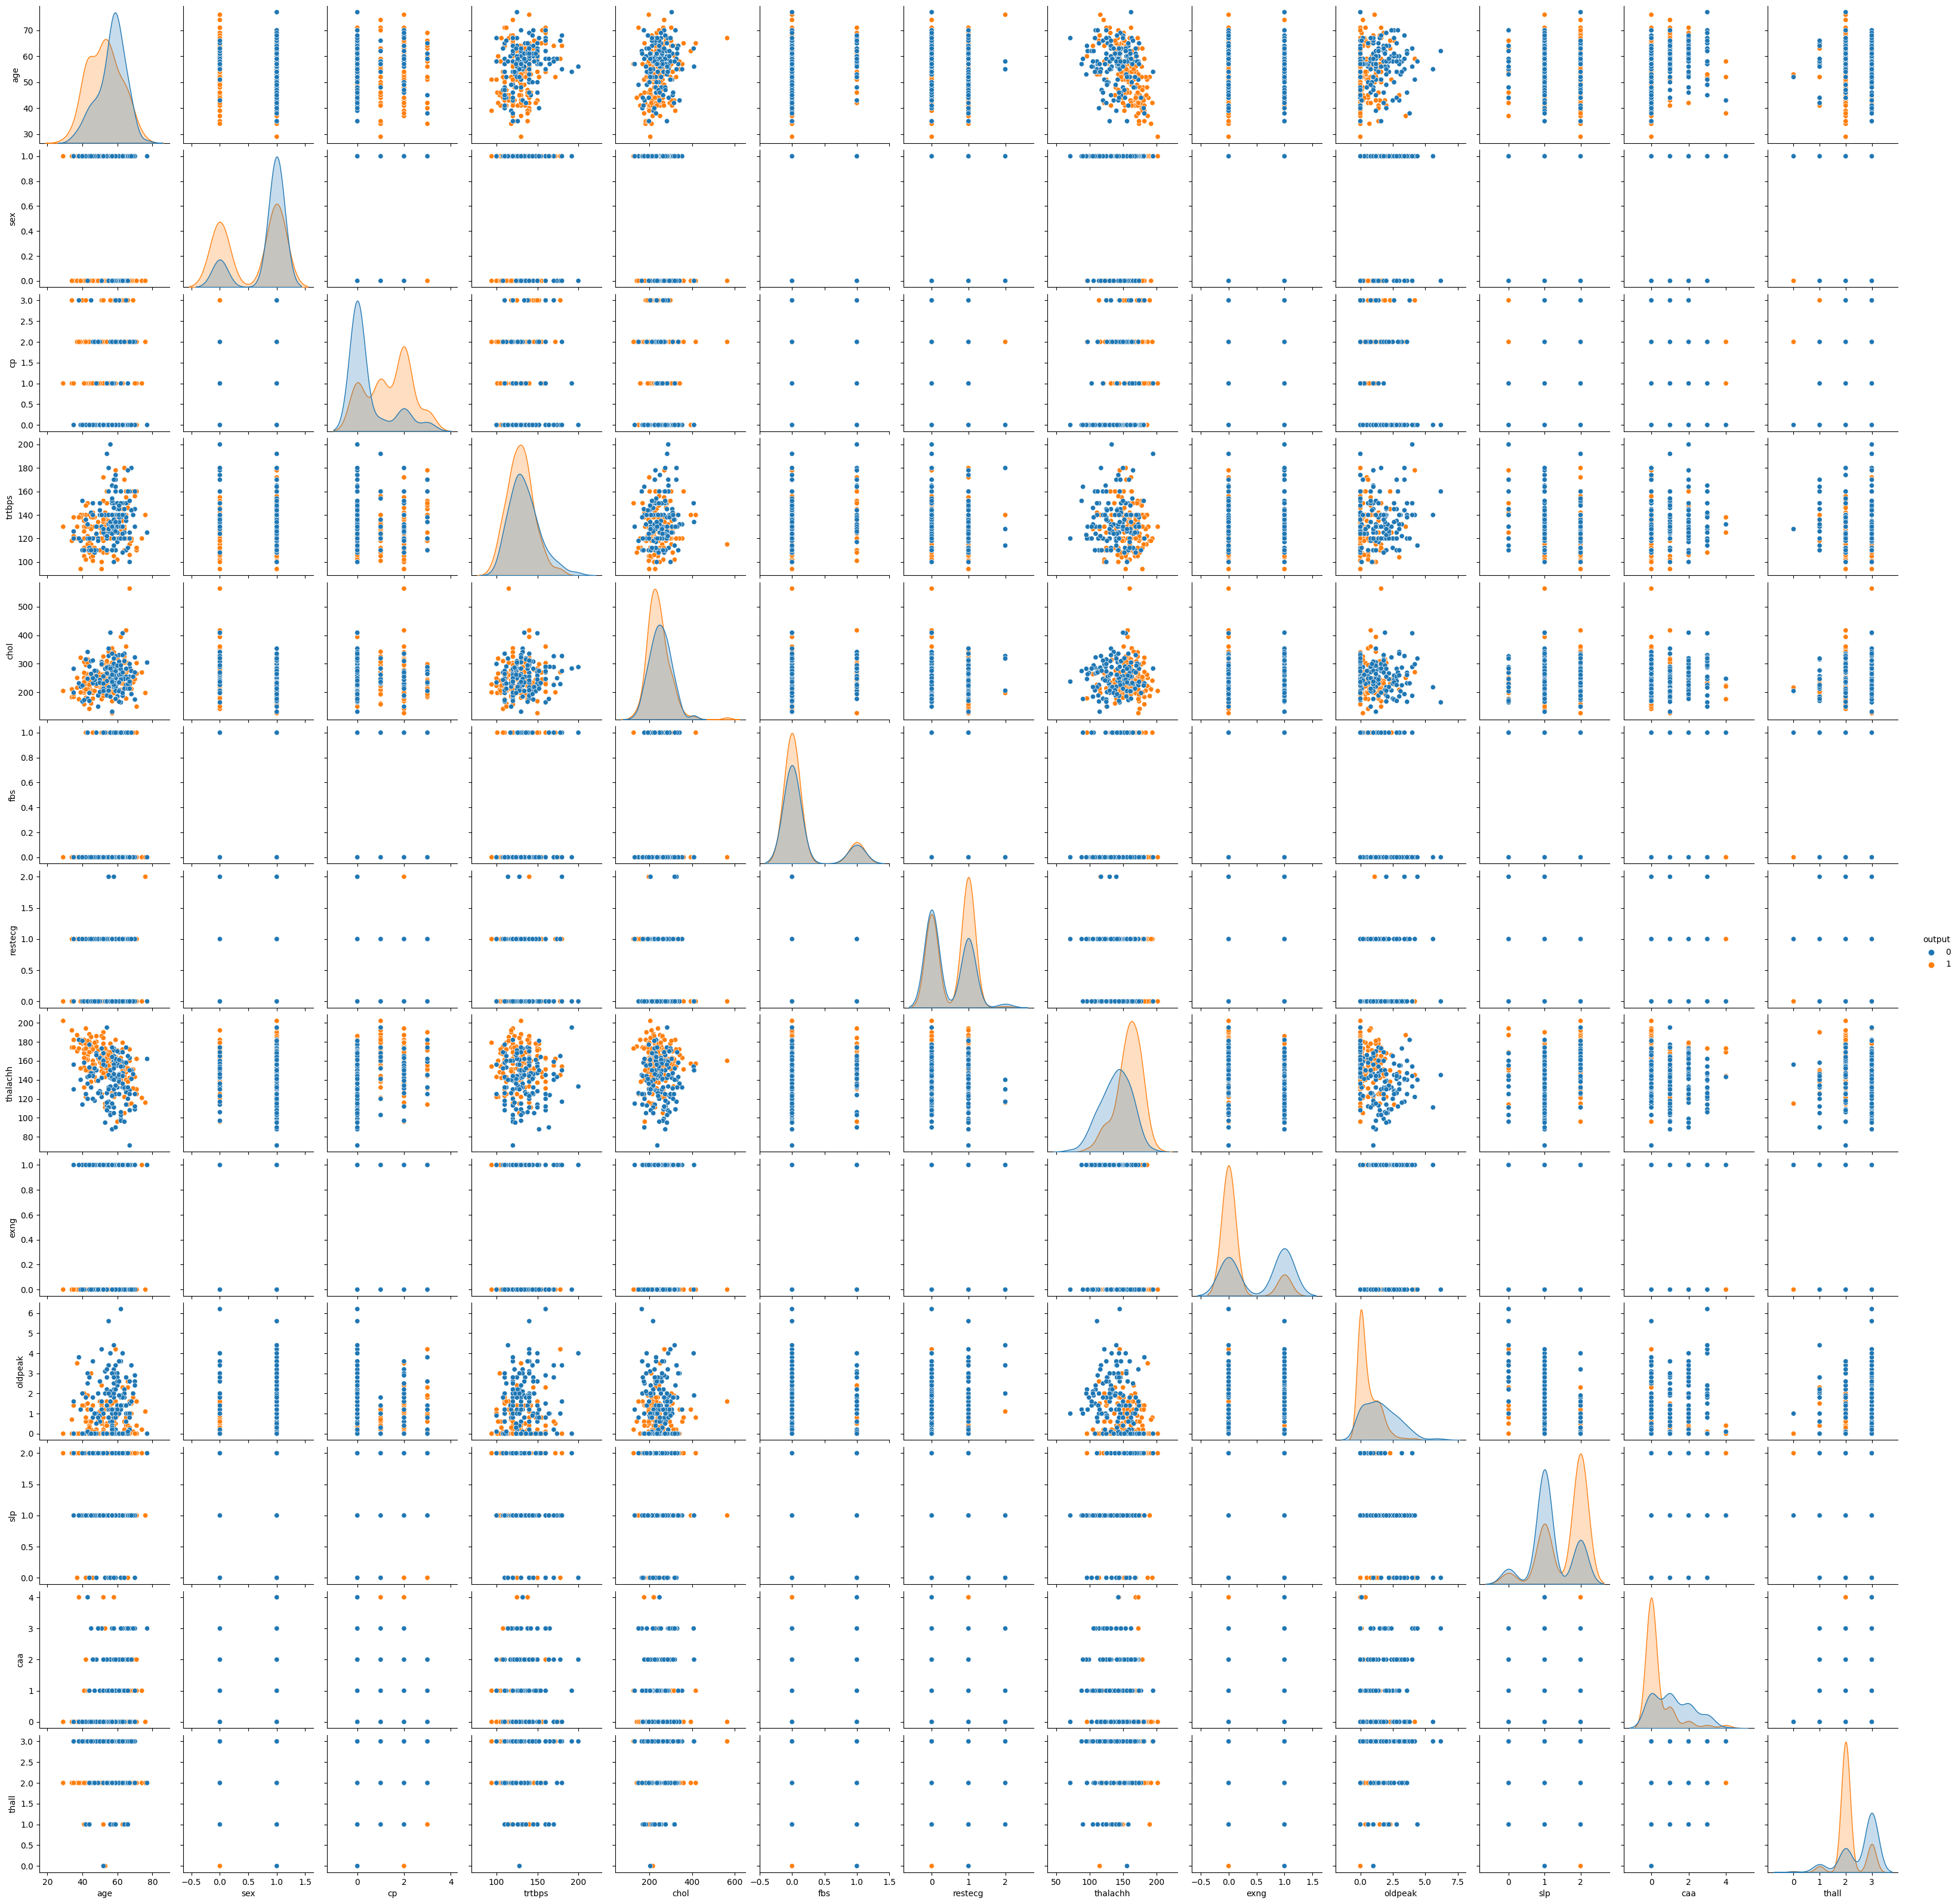

In [ ]:
# view correlations between features
sns.pairplot(data=cardio_df, hue='output')
plt.show()

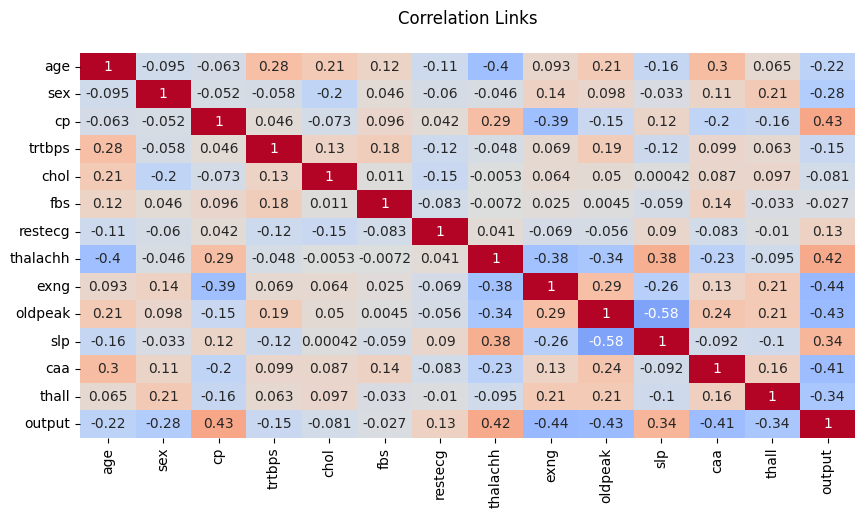

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Correlation Links\n')
sns.heatmap(cardio_df.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            cbar=False,
            annot=True)
plt.show()

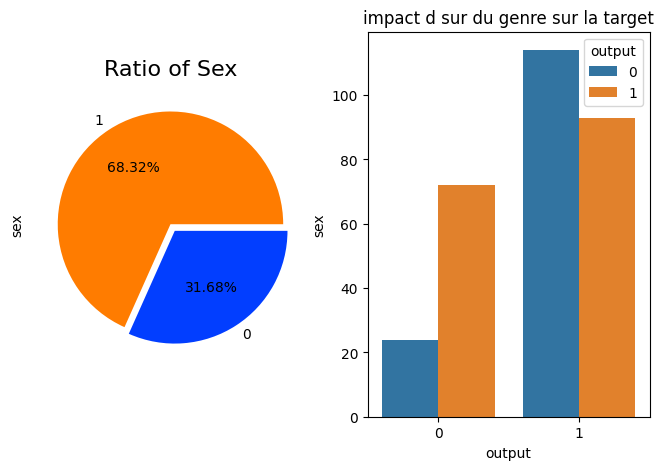

In [33]:
palette_color = sns.color_palette('bright')

plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
ax1 = cardio_df['sex'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],

                                             autopct='%.2f%%');
ax1.set_title("Ratio of Sex", fontsize=16);

plt.subplot(1,2,2)

sns.countplot(data=cardio_df, x='sex', hue= 'output')
plt.title("impact d sur du genre sur la target")
plt.xlabel("output")
plt.ylabel("sex")
plt.show()



(age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
 38   1    2   138     175   0    1        173       0     0.0      2    4    2      1         2
 29   1    1   130     204   0    0        202       0     0.0      2    0    2      1         1
 57   1    2   150     168   0    1        174       0     1.6      2    0    2      1         1
 56   1    1   130     221   0    0        163       0     0.0      2    0    3      1         1
           3   120     193   0    0        162       0     1.9      1    0    3      1         1
                                                                                              ..
 48   1    1   130     245   0    0        180       0     0.2      1    0    2      1         1
           2   124     255   1    1        175       0     0.0      2    2    2      1         1
 49   0    0   130     269   0    1        163       0     0.0      2    0    2      1         1
           1   134     271   0    1

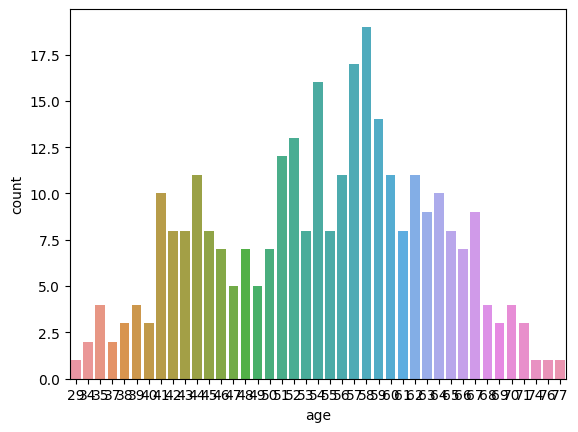

In [ ]:
# view age impact
cardio_df.loc[cardio_df["output"] ==1].value_counts(),sns.countplot(x=cardio_df["age"])

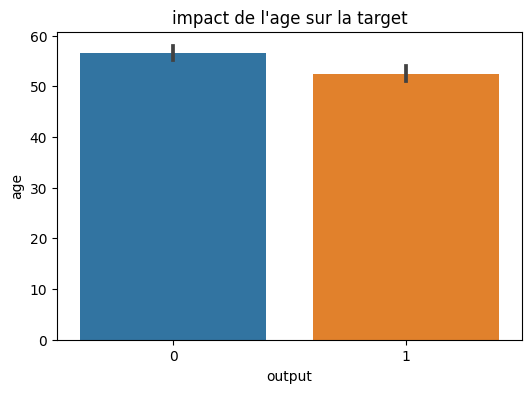

In [16]:
plt.figure(figsize=(6,4))


sns.barplot(data=cardio_df, y='age', x='output')
plt.title("impact de l'age sur la target")
plt.xlabel("output")
plt.ylabel("age")
plt.show()


# Check outliers
cardio_df

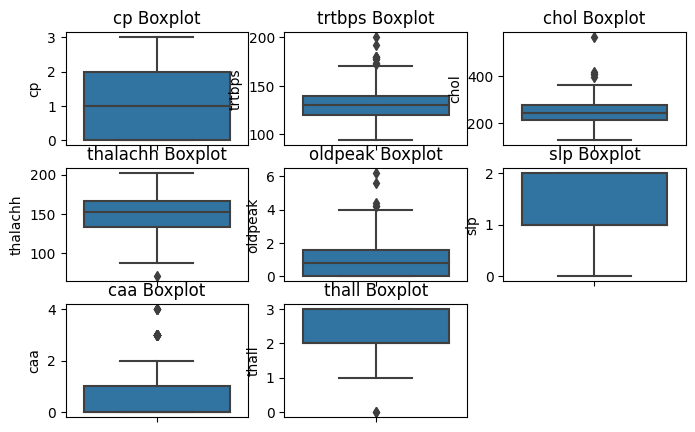

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(3, 3, 1)
sns.boxplot(y="cp", data=cardio_df)
plt.title("cp Boxplot");

plt.subplot(3, 3, 2)
sns.boxplot(y="trtbps", data=cardio_df)
plt.title("trtbps Boxplot");

plt.subplot(3, 3, 3)
sns.boxplot(y="chol", data=cardio_df)
plt.title("chol Boxplot");

plt.subplot(3, 3, 4)
sns.boxplot(y="thalachh", data=cardio_df)
plt.title("thalachh Boxplot");


plt.subplot(3, 3, 5)
sns.boxplot(y="oldpeak", data=cardio_df)
plt.title("oldpeak Boxplot");

plt.subplot(3, 3, 6)
sns.boxplot(y="slp", data=cardio_df)
plt.title("slp Boxplot");

plt.subplot(3, 3, 7)
sns.boxplot(y="caa", data=cardio_df)
plt.title("caa Boxplot");

plt.subplot(3, 3, 8)
sns.boxplot(y="thall", data=cardio_df)
plt.title("thall Boxplot");

# Preprocessing


In [36]:
y=cardio_df["output"]
X=cardio_df.drop("output",axis=1)


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [38]:
num_features=["age" , "trtbps" , "chol" , "thalachh" , "oldpeak" ]


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer=ColumnTransformer([("scaler",StandardScaler(),num_features)],remainder="passthrough")
pd.DataFrame(column_transformer.fit_transform(X_test),columns=X_train.columns).head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.367909,0.764415,0.635157,-1.575371,-0.362458,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.605876,1.859524,0.894451,0.401869,-0.667686,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0
2,0.367909,0.764415,-2.606019,0.990834,-0.667686,1.0,2.0,1.0,1.0,0.0,2.0,1.0,3.0


# Modeling


In [40]:


X_train = pd.DataFrame(column_transformer.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(column_transformer.transform(X_test),columns=X_train.columns)

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train, y_train)

#log_predict = log_model.predict(X_test)



LogisticRegression()

In [43]:
from sklearn.model_selection import cross_val_score

cross_val_score(log_model, X_train, y_train,cv = 5, scoring='accuracy' )

array([0.7826087 , 0.86956522, 0.71111111, 0.84444444, 0.77777778])

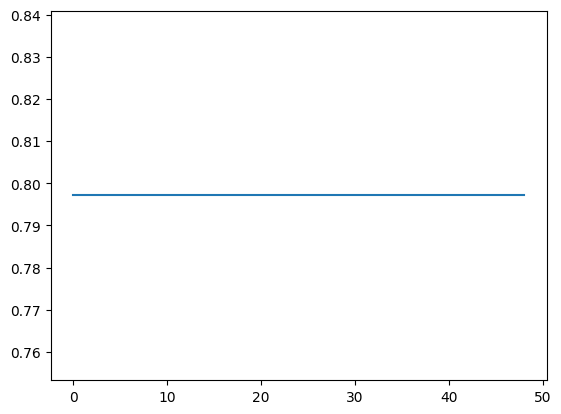

In [49]:
val_score = []

for c in range(1,50):
    score = cross_val_score(LogisticRegression(), X_train, y_train, cv= 5,scoring='accuracy').mean()

    val_score.append(score)
plt.plot(val_score)